<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw3/pharmacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pharmacy Simulation

Math 210 -- Chartier<br>
Assignment 3

Program: pharmacy.ipynb<br>
Author:  (include your name)

Description: Pharmacy model suggested by 
S. M. Ross, "A Course in Simulation."  The 
following code simulates one day. 

******************************************
            Pharmacy Simulation
******************************************

5000 trials ended.
Average minutes late: 0.008855478770001776
Pharmacist working at 5:30 0 times out of 5000 trials.


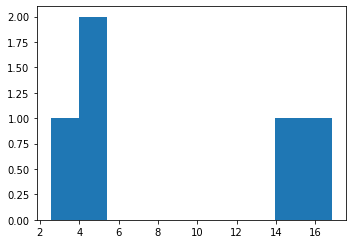

In [20]:
import numpy as np
from matplotlib import pyplot as plt

print('******************************************')
print('            Pharmacy Simulation')
print('******************************************\n')

minutes_in_day = 8*60  # number of minutes in 9:00-5:00 day

a = 32/minutes_in_day  # average number of arrivals per minute

# Set up holder for trial data
num_trials = 5000
minutes_late_data = np.zeros(num_trials)
print_each = False

# Notation:
#  at = arrival time of prescriptions
#  st = service time once they reach the front of queue
#  ft = finish time after waiting and being filled.
#

ncust = 200  # don't know how many customers, this is an upper bound (we hope)

for trial in range(num_trials):
  # initialize arrays:
  at = np.zeros(ncust)  

  # Generate random arrival times (in minutes) assuming Poisson process:
  r = np.random.rand(ncust)
  iat = -1/a * np.log(r) # Generate inter-arrival times, exponential distribution
  at[0] = iat[0]         # Arrival time of first customer

  for i in range(1,ncust):
    at[i] = at[i-1] + iat[i]   # arrival times of other customers

  # only the one arriving before 5:00 are accepted
  ibefore5 = np.where(at<=minutes_in_day)   # index of arrival times before 5:00
  at = at[ibefore5]                         # chop down the array to only these
  ncust = len(at)                           # now we know how many customers

  # Generate random service times for each customer:
  # normal distribution with mean 10 minutes and standard deviation 4 minutes:
  st = 10 + 4*np.random.randn(ncust)

  # Compute time each customer finishes:
  ft = np.zeros(ncust)
  ft[0] = at[0]+st[0]  # finish time for first customer
  for i in range(1,ncust):
    # compute finish time for each customer as the larger of
    # arrival time plus service time (if no wait)
    # finish time of previous customer plus service time (if wait)
    ft[i] = np.amax([at[i]+st[i],ft[i-1]+st[i]])
  if print_each:
    print('Finish time of last prescription:  %6.2f \n' % ft[ncust-1])

  # Determine how many minutes late the pharmacist must stay past 5:00
  minutes_late = np.amax([0, ft[ncust-1]-minutes_in_day])

  if print_each:
    print('Minutes past 5:00 that pharmacist must stay:    %6.2f \n' % minutes_late)

  minutes_late_data[trial] = minutes_late

# Results
print('{} trials ended.'.format(num_trials))
mean_minutes_late = np.mean(minutes_late_data)
print('Average minutes late: {}'.format(mean_minutes_late))
at530 = len([i for i in minutes_late_data if i >= 30])
print('Pharmacist working at 5:30 {} times out of {} trials.'.format(at530,num_trials))
fig, ax = plt.subplots(figsize =(5, 3.5), tight_layout = True)
ax.hist([data for data in minutes_late_data if data > 0])
plt.show()

[30.274904223892634]

***
## Here are some programming notes that may help. 

In [ ]:
import numpy as np

### First let's make an array of 10 uniformly distributed random numbers.

In [ ]:
randomNumbers = np.random.rand(10)
print(randomNumbers)

[0.04650529 0.51235547 0.30667713 0.267987   0.86907293 0.89379791
 0.9694175  0.89382072 0.30680975 0.06016645]


### Let's find the indices of where the array elements are less than 0.5.  

In [ ]:
indicesMeetingCondition = np.argwhere(randomNumbers < 0.5)
# We know have the indices that meet a condition. 
print(indicesMeetingCondition)

[[0]
 [2]
 [3]
 [8]
 [9]]


### Now, just find the length of that array.

In [ ]:
len(indicesMeetingCondition)

5

### __BUT__, you might want to know how many elements there are __and__ create an array with those entries.  Here are commands for this: 

In [ ]:
indicesMeetingConditionVersion2 = np.where(randomNumbers < 0.5)
# We know have the indices that meet a condition. 
print(indicesMeetingConditionVersion2)

(array([0, 2, 3, 8, 9]),)


### This time, we have a tuple with the first element being an array.  So, to the know the length we need to use: 

In [ ]:
len(indicesMeetingConditionVersion2[0])

5

### Uh, why use this?  It's more complicated.  Here is why.  

In [ ]:
newArray = randomNumbers[indicesMeetingConditionVersion2]
print(newArray)

[0.04650529 0.30667713 0.267987   0.30680975 0.06016645]


### If you use indicesMeetingCondition rather than indicesMeetingConditionVersion2, then you get an array of arrays. 